In [13]:
"""
Complete the functions and the other sections below to build a complete model of a simple neural network (equivalent to Logistic Regression). 
The incomplete parts are marked and you need to fill them up to finish this assignment

DATA: handwritten digits classified into two classes Even (0) and Odd (1)
"""


import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from sklearn import datasets

(1597, 8, 8) (1, 1597) (200, 8, 8) (1, 200)
y = [1], it's a 'odd' number.
Number of training examples: m_train = 1597
Number of testing examples: m_test = 200
Height/Width of each image: num_px = 8
Each image is of size: (8, 8)
train_set_x shape: (1597, 8, 8)
train_set_y shape: (1, 1597)
test_set_x shape: (200, 8, 8)
test_set_y shape: (1, 200)
train_set_x_flatten shape: (64, 1597)
train_set_y shape: (1, 1597)
test_set_x_flatten shape: (64, 200)
test_set_y shape: (1, 200)
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.692835
Cost after iteration 200: 0.692527
Cost after iteration 300: 0.692221
Cost after iteration 400: 0.691917
Cost after iteration 500: 0.691613
Cost after iteration 600: 0.691311
Cost after iteration 700: 0.691009
Cost after iteration 800: 0.690708
Cost after iteration 900: 0.690407
Cost after iteration 1000: 0.690107
Cost after iteration 1100: 0.689807
Cost after iteration 1200: 0.689507
Cost after iteration 1300: 0.689207
Cost after iteration 1400: 0.688

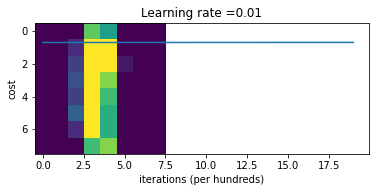

In [1]:
"""
Complete the functions and the other sections below to build a complete model of a simple neural network (equivalent to Logistic Regression). 
The incomplete parts are marked and you need to fill them up to finish this assignment

DATA: handwritten digits classified into two classes Even (0) and Odd (1)
"""


import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from sklearn import datasets


##Loading the data
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))

train_set_x_orig = [] 
train_set_y = []
test_set_x_orig = [] 
test_set_y = []
classes = ['even','odd']


data_size = len(images_and_labels)
#Setting the testset size
test_set_size = 200


##Splitting the data into training and test sets and assigning the labels: Even (0), Odd (1)

for i in range(len(images_and_labels))[:-test_set_size]:
    train_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] %2 == 0: ##if even put 0 as the label
        train_set_y.append(0)
    else: ##if odd put 1 as the label
        train_set_y.append(1)
        
for i in range(len(images_and_labels))[-test_set_size:]:
    test_set_x_orig.append(images_and_labels[i][0])
    if images_and_labels[i][1] %2 == 0: ##if even put 0 as the label
        test_set_y.append(0)
    else: ##if odd put 1 as the label
        test_set_y.append(1)

train_set_x_orig = np.array(train_set_x_orig)
train_set_y = np.array(train_set_y).reshape(1,data_size-test_set_size)
test_set_x_orig = np.array(test_set_x_orig)
test_set_y = np.array(test_set_y).reshape(1,test_set_size)

print(train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape)

## Display an example from the data
index = 1
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])] +  "' number.")

m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[2]

##Description of the data
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ")")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# Reshape the training and test examples from 2D matrix to a 1D vector. The input vector of a neural network is always 1D
train_set_x_flatten = train_set_x_orig.reshape(m_train,(num_px*num_px)).T
test_set_x_flatten = test_set_x_orig.reshape(m_test,(num_px*num_px)).T

# Print the description after reshaping
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

# Standardize the pixel value
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1 + np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.zeros([dim, 1])
    b = 0.0
    
    ## veryifying the shape of the w vector
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if even and 1 if odd) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    
    """
    
    m = float(X.shape[1])
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -1/m * (np.dot(Y,np.log(A).T) + np.dot((1-Y),np.log(1 - A).T)) 

    # BACKWARD PROPAGATION (TO FIND GRADIENTS)
    
    dw = 1 / m *(np.dot(X,(A - Y).T))
    db =  1 / m *(np.sum(A - Y))
    
    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if even, 1 if odd), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
                 
        grads, cost = propagate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Recordint the cost after every 100 iterations
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1) in this case (8 * 8, 1)
    b -- bias, a scalar 
    X -- data of size (num_px * num_px, number of examples) in this case (8 * 8, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i], i.e. if probability >=0.5 output 1, else 0
        if(A[0][i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
        
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters" returned by the function above
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Calling the function to train the model. FEEL FREE TO MODIFY THE HYPERPARAMETERS (num_iterations AND learning_rate) to experiment with the accuracy
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.01, print_cost = True)




## Using the model you built to predict the digit of an image
index = 24
plt.imshow(test_set_x[:,index].reshape((num_px, num_px)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])] +  "\" number.")

## View how the cost varied with iterations
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

